<a href="https://colab.research.google.com/github/BiancadeFrancisco/Clusterizacao_KMEANS/blob/main/C%C3%B3pia_de_CLUSTERIZA%C3%87%C3%83O.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install kmodes

In [ ]:
# Data wrangling

import numpy as np
import pandas as pd

In [ ]:
# Dataviz (VISUALIZAÇÃO DOS DADOS)

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance, kelbow_visualizer, silhouette_visualizer

In [ ]:
## -- Machine learning -- ##

from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.cluster import k_means, dbscan, mean_shift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from kmodes.kmodes import KModes            # clustering categorical data
from kmodes.kprototypes import KPrototypes  # clustering mixed data

In [ ]:
# Didatic purposes (FINS DIDÁTICOS)

import string
from ipywidgets import interact

In [ ]:
# CONFIGURAÇÕES PRÉ ESTABELECIDAS DOS GRÁFICOS, PARA AGRADAR E PADRONIZAR ESTÉTICAMENTE: (https://matplotlib.org/stable/tutorials/introductory/customizing.html)

sns.set_theme(
    context='talk', # aplicando no contexto que o tamanho da figura e as letras serão maiores
    style='ticks', # fundo branco
    font_scale=.8, # escala do tamanho de 80%
    palette='tab10', # paleta de cores específica
    rc={
        'figure.figsize': (12,8), # tamanho do gráfico específica
        'axes.grid': True, # terá linhas de fundo
        'grid.alpha': .2, # grau de transparencia 20%
        'axes.titlesize': 'x-large', # título será maior
        'axes.titleweight': 'bold', # título será em negrito
        'axes.titlepad': 20, # espaço entre o gráfico e o título
    }
)

scatter_kwargs = dict(palette='viridis', alpha=0.8, linewidth=0)

In [ ]:
# SIMULAR CLUSTERIZAÇÃO:

# (datasets.make_blobs?), vai me mostrar os parâmetros padrão

datasets.make_blobs(n_samples=5000, n_features=2, centers=4, cluster_std=0.8)


(array([[-4.71725954,  9.91008026],
        [-3.7997133 , -4.71998564],
        [-2.286898  , -4.33563738],
        ...,
        [-6.56008902, -0.09047948],
        [-3.48630255,  8.93597442],
        [-4.33303742, 10.21887103]]),
 array([0, 3, 1, ..., 2, 0, 0]))

In [ ]:
# SIMULAR CLUSTERIZAÇÃO:

X, y = datasets.make_blobs(n_samples=5000, n_features=2, centers=4, cluster_std=0.8)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]])) #(string.ascii_uppercase[:X.shape[1]]), para buscar a lista de letras do alfabeto e colocar nos índices das colunas que gerar
df.head()

,A,B
0,-9.703766,3.134426
1,4.433959,-4.807037
2,0.947623,5.135816
3,-9.050050,2.868642
4,-3.796535,-6.192790


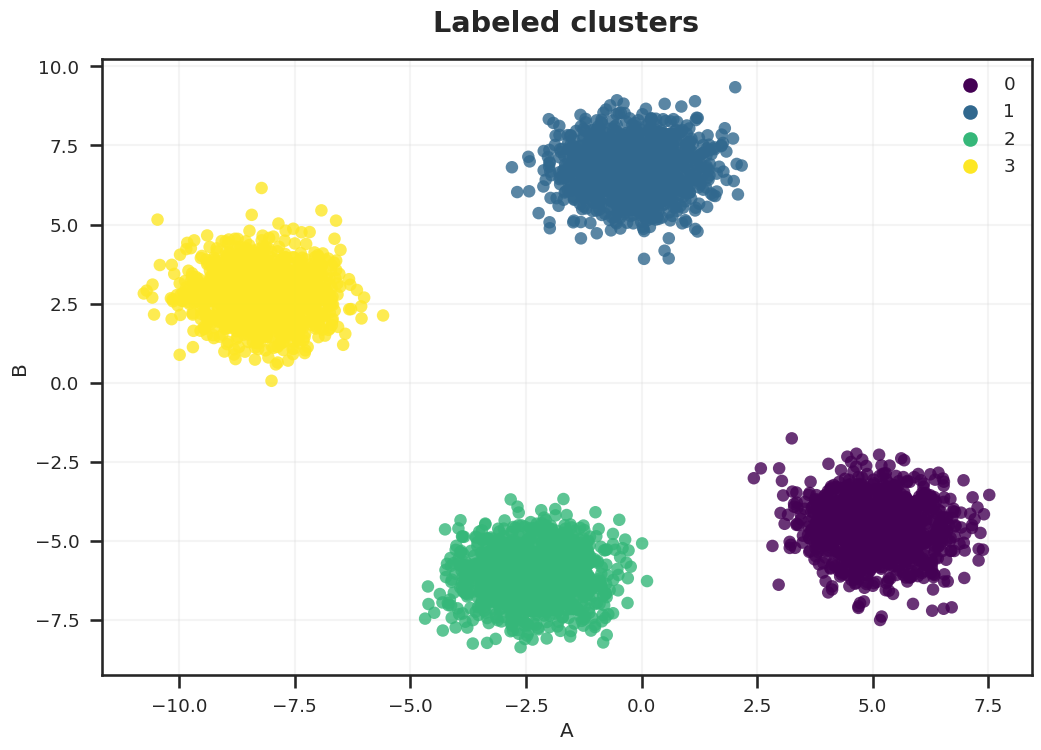

In [ ]:
# PLOTAR A SIMULAÇÃO DA CLUSTERIZAÇÃO:

sns.scatterplot(data=df, x='A', y='B', hue=y, **scatter_kwargs)
plt.title('Labeled clusters')
plt.show()


# DIFERENTES APIs PARA K-means

No sklearn, podemos utilizar algoritmos de clusterização através classes ou funções (vide [este link](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster)).

In [ ]:
# Usando função

k_means? #para verificar parÂmetros

k_means(X, n_clusters=4)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([[-2.36917656, -6.11525322],
        [-0.19247906,  6.73213216],
        [-8.20658997,  2.78392178],
        [ 5.11037848, -4.62794242]]),
 array([2, 3, 1, ..., 3, 2, 1], dtype=int32),
 6406.6241896792235)

In [ ]:
centroids, labels, intertia = k_means(X, n_clusters=4)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


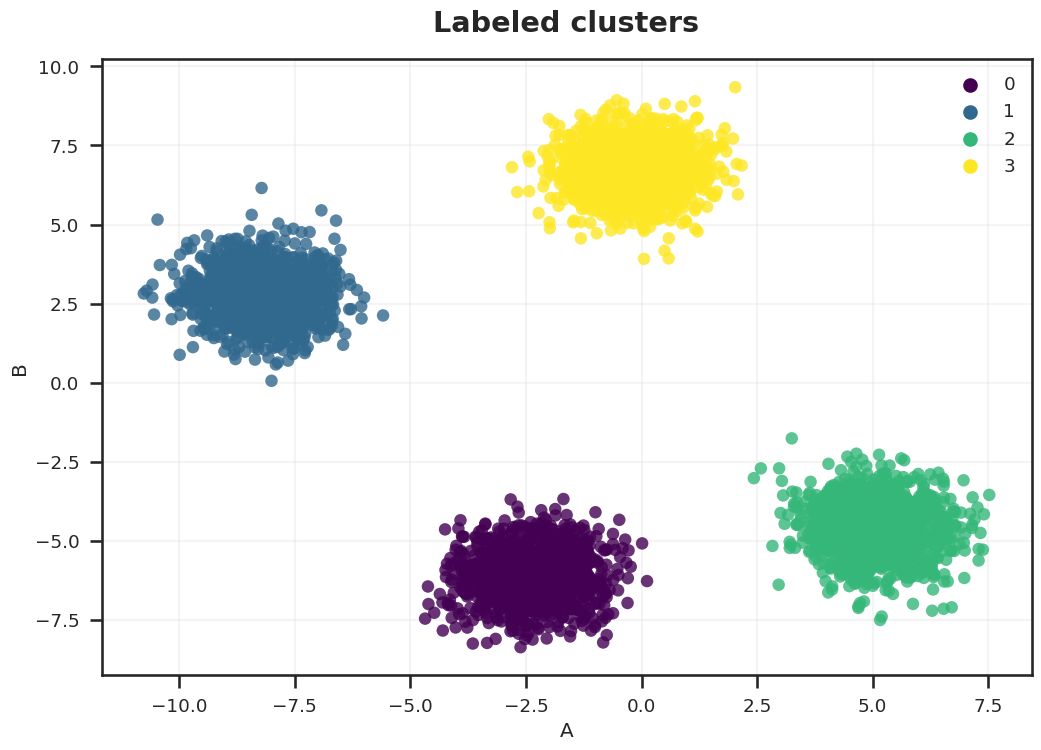

In [ ]:
sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)
plt.title('Labeled clusters')
plt.show()

In [ ]:
# Classes KMeans (difereça da função, é que podemos utilizar as classes em Pipelines)

model = KMeans(n_clusters=4)
model.fit(X)

centroids = model.cluster_centers_
labels = model.labels_
inertia = model.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
centroids # localização dos centróides

array([[-8.20658997,  2.78392178],
       [ 5.11037848, -4.62794242],
       [-0.19247906,  6.73213216],
       [-2.36917656, -6.11525322]])

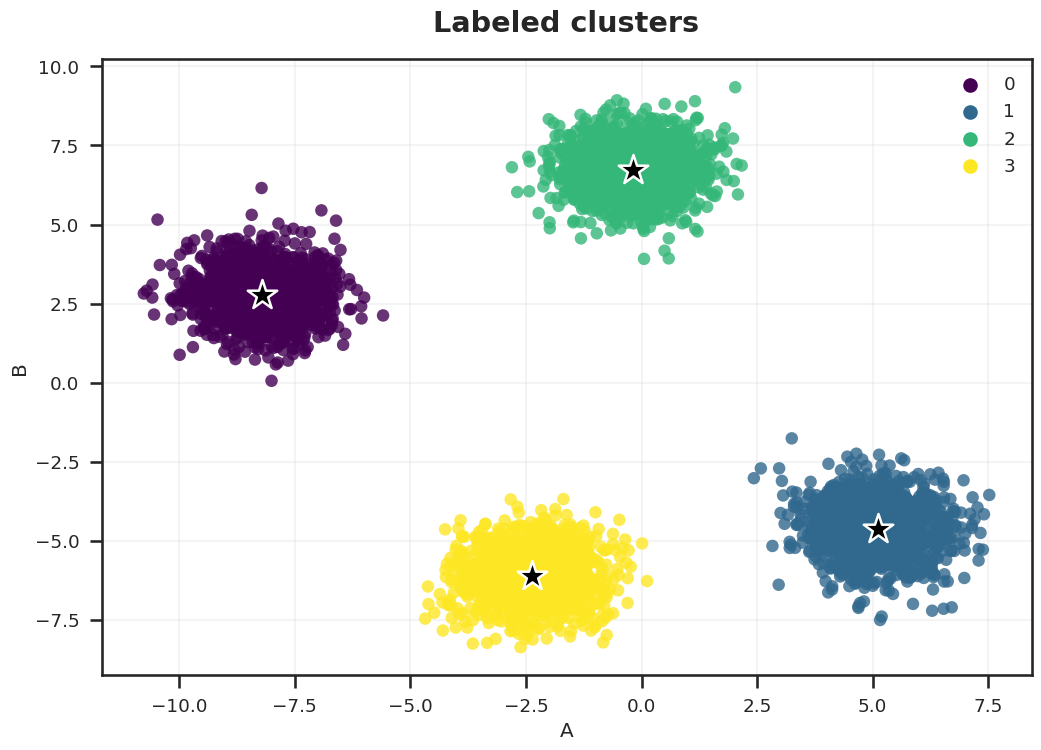

In [ ]:


ax = sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)
sns.scatterplot(x=centroids[:,0], y=centroids[:,1], marker='*', s=500, color='black', ax=ax)

plt.title('Labeled clusters')
plt.show()

## AVALIANDO O MODELO:

# Uma boa clusterização vai produzir:
- Alta similaridade intra-cluster
- Pouca similaridade entre clusters

Métricas:
- WCSS
- Silhouette
- Davies Bouldin (`intracluster / intercluster`)
- Calinski Harabasz (`soma_intercluster / soma_intracluster`)

In [ ]:
# MÉTRICAS DENTRO DO SKLEARN:

silhouette_score(X, labels)
print(f"Silhouette: {silhouette_score(X, labels)}") #ótima, está bem próxima de 1

davies_bouldin_score(X, labels)
print(f"Davies Bouldin: {davies_bouldin_score(X, labels)}") #ótimo tbm, quanto menos, melhor.

calinski_harabasz_score(X, labels)
print(f"Calinski Harabasz: {calinski_harabasz_score(X, labels)}") #bom tbm, quanto mais, melhor.


Silhouette: 0.8271996333604776
Davies Bouldin: 0.24384858869347248
Calinski Harabasz: 65836.38180410868


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

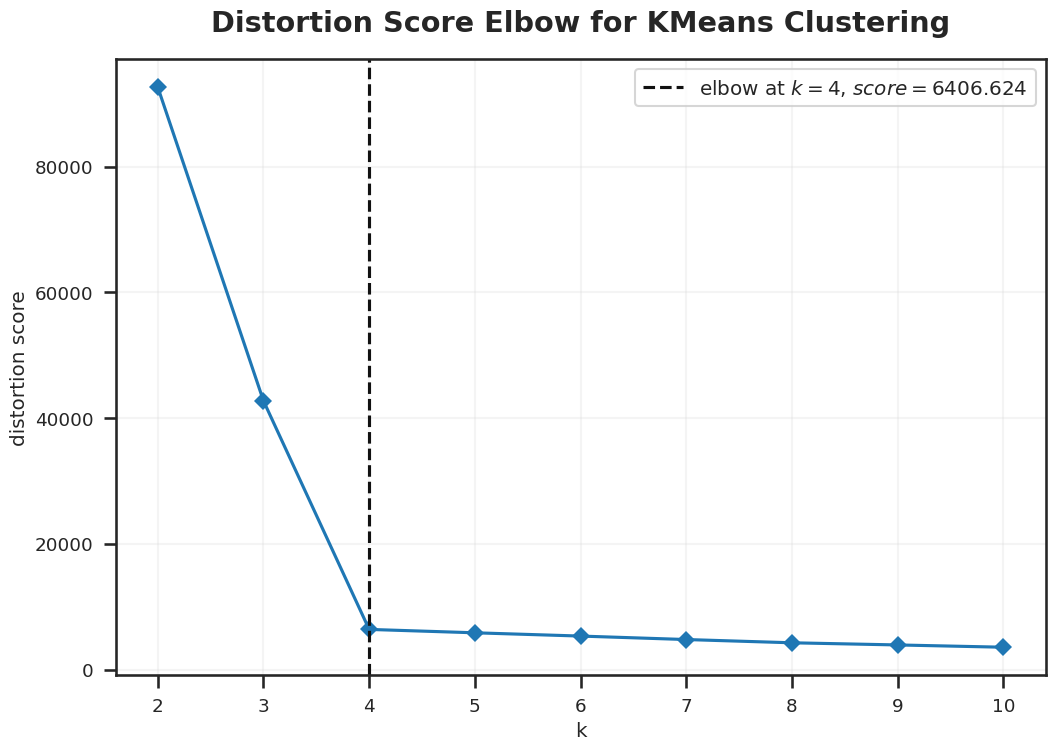

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=10), timings=False)

In [ ]:
# PLOTAR GRÁFICO DE ELBOW (COTOVELO), PARA VERIFICAR O NÚMERO SUGERIDO DE GRUPOS (K):

kelbow_visualizer?
kelbow_visualizer(KMeans(), X, k=10, timings=False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


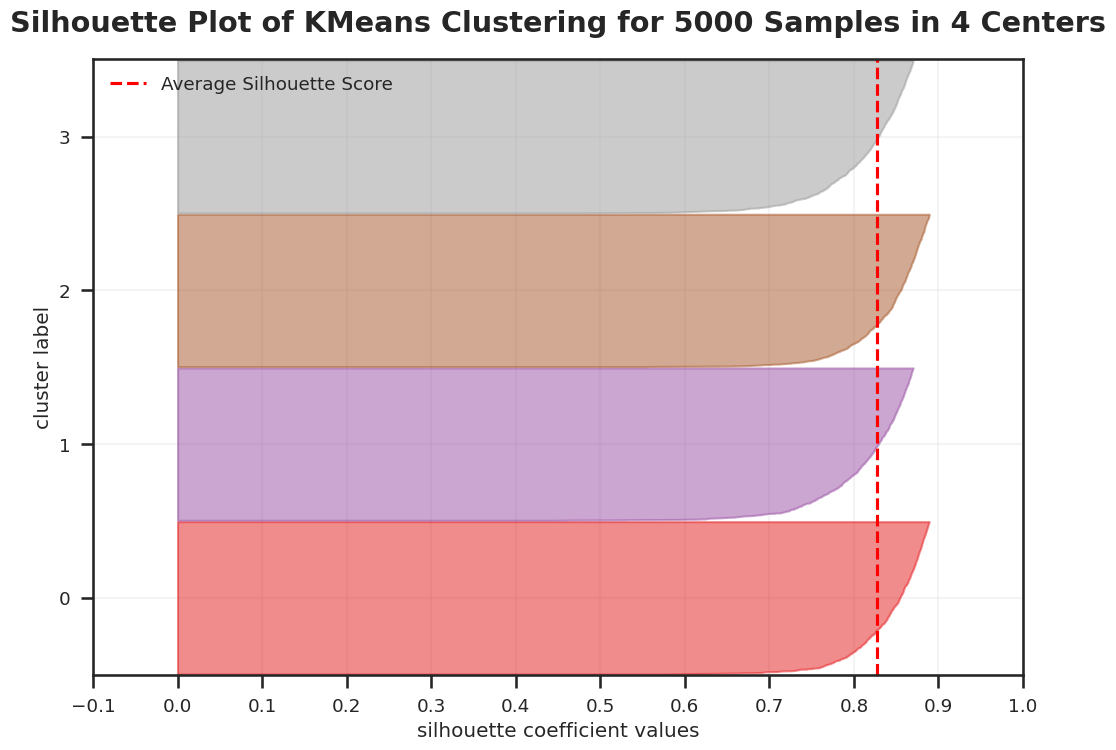

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 5000 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     estimator=KMeans(n_clusters=4))

In [ ]:
# PLOTAR GRÁFICO DE SILHOUETTE:

silhouette_visualizer?
silhouette_visualizer(KMeans(n_clusters=4), X)

In [ ]:
# CRIAR UMA LISTA DE DICIONÁRIOS PARA OBTER TODAS AS MÉTRICAS PARA CADA AGRUPAMENTO

cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score #definindo as métricas que iremos utilizar
cluster_metrics_results = [] #lista vazia para salvar os resultados

for k in range(2,11):
  model = KMeans(n_clusters=k, random_state=0) #criar modelo
  labels = model.fit_predict(X)
  cluster_results_dict = {'k': k} #criar dicionário para cada iteração
  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X, labels)
  cluster_metrics_results.append(cluster_results_dict)

cluster_metrics_results

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[{'k': 2,
  'inertia': 92637.98412636534,
  'silhouette_score': 0.6193084507512259,
  'davies_bouldin_score': 0.730072072766998,
  'calinski_harabasz_score': 9012.383975973966},
 {'k': 3,
  'inertia': 42754.02237068654,
  'silhouette_score': 0.7222774391733082,
  'davies_bouldin_score': 0.39762752390104156,
  'calinski_harabasz_score': 12677.078504650082},
 {'k': 4,
  'inertia': 6406.6241896792235,
  'silhouette_score': 0.8271996333604776,
  'davies_bouldin_score': 0.24384858869347248,
  'calinski_harabasz_score': 65836.38180410869},
 {'k': 5,
  'inertia': 5872.7862381630675,
  'silhouette_score': 0.6975549561618878,
  'davies_bouldin_score': 0.6336982007674535,
  'calinski_harabasz_score': 53971.352129515915},
 {'k': 6,
  'inertia': 5332.694102533563,
  'silhouette_score': 0.5687509472897163,
  'davies_bouldin_score': 0.8953904604042761,
  'calinski_harabasz_score': 47642.45638855811},
 {'k': 7,
  'inertia': 4810.7063367767005,
  'silhouette_score': 0.43592861118128656,
  'davies_boul

In [ ]:
# CRIAR DATAFRAME

pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,92637.984126,0.619308,0.730072,9012.383976
3,42754.022371,0.722277,0.397628,12677.078505
4,6406.624190,0.827200,0.243849,65836.381804
5,5872.786238,0.697555,0.633698,53971.352130
6,5332.694103,0.568751,0.895390,47642.456389
7,4810.706337,0.435929,1.092808,44096.689606
8,4316.400957,0.309449,1.253988,42204.199573
9,3936.473414,0.317548,1.140035,40541.545959
10,3569.620391,0.325390,1.053658,39782.494518


In [ ]:
# DATAFRAME ESTILIZADO

(
  pd.DataFrame(cluster_metrics_results)
  .set_index('k')
  .style.background_gradient(cmap='Oranges', subset='inertia')
  .highlight_max(subset=['silhouette_score','calinski_harabasz_score'])
  .highlight_min(subset='davies_bouldin_score')
)

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,92637.984126,0.619308,0.730072,9012.383976
3,42754.022371,0.722277,0.397628,12677.078505
4,6406.624190,0.827200,0.243849,65836.381804
5,5872.786238,0.697555,0.633698,53971.352130
6,5332.694103,0.568751,0.895390,47642.456389
7,4810.706337,0.435929,1.092808,44096.689606
8,4316.400957,0.309449,1.253988,42204.199573
9,3936.473414,0.317548,1.140035,40541.545959
10,3569.620391,0.325390,1.053658,39782.494518


# Repetindo procedimento acima com dados simulados aleatórios:

In [ ]:
# X_random with numpy
X_random = np.random.rand(*X.shape)
X_random

array([[0.45356688, 0.13865332],
       [0.0829218 , 0.71850988],
       [0.9495124 , 0.09329952],
       ...,
       [0.74395242, 0.81249033],
       [0.6512506 , 0.40887706],
       [0.72704875, 0.49642355]])

In [ ]:
# CRIAR UMA LISTA DE DICIONÁRIOS PARA OBTER TODAS AS MÉTRICAS PARA CADA AGRUPAMENTO:


cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []

for k in range(2,11):
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(X_random)
  cluster_results_dict = {'k': k}
  cluster_results_dict['inertia'] = model.inertia_
  for metric in cluster_metrics:
    cluster_results_dict[metric.__name__] = metric(X_random, labels)
  cluster_metrics_results.append(cluster_results_dict)

# CRIAR DATAFRAME:

pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,516.687530,0.353720,1.180549,3030.969276
3,328.436837,0.377391,0.865263,3815.664127
4,209.111663,0.404261,0.773218,4944.853426
5,174.945433,0.392920,0.833845,4675.880429
6,147.086830,0.382430,0.831362,4637.589277
7,124.796979,0.374314,0.800924,4702.592149
8,106.945190,0.361405,0.813686,4821.664694
9,92.228443,0.364588,0.778837,4990.843827
10,84.328352,0.366198,0.816600,4902.851188


In [ ]:
# DATAFRAME ESTILIZADO

(
  pd.DataFrame(cluster_metrics_results)
  .set_index('k')
  .style.background_gradient(cmap='Oranges', subset='inertia')
  .highlight_max(subset=['silhouette_score','calinski_harabasz_score'])
  .highlight_min(subset='davies_bouldin_score')
)

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,516.687530,0.353720,1.180549,3030.969276
3,328.436837,0.377391,0.865263,3815.664127
4,209.111663,0.404261,0.773218,4944.853426
5,174.945433,0.392920,0.833845,4675.880429
6,147.086830,0.382430,0.831362,4637.589277
7,124.796979,0.374314,0.800924,4702.592149
8,106.945190,0.361405,0.813686,4821.664694
9,92.228443,0.364588,0.778837,4990.843827
10,84.328352,0.366198,0.816600,4902.851188


# COMPARANDO DE FORMA INTERATIVA OS DOIS EXEMPLOS:


interactive(children=(IntSlider(value=6, description='k', max=11, min=2), Dropdown(description='data', options…

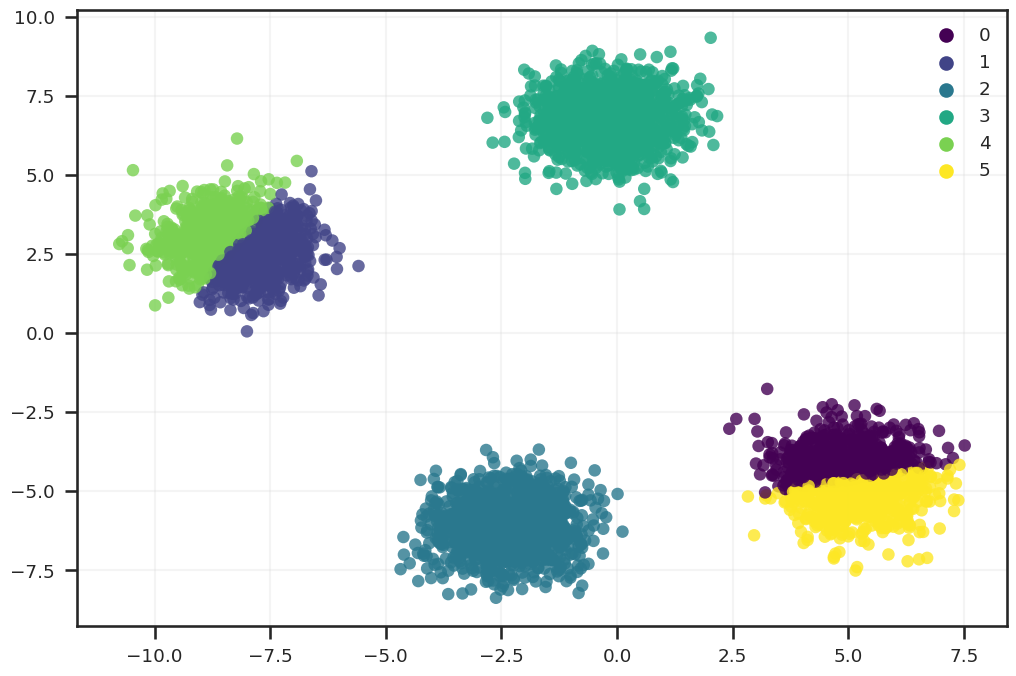

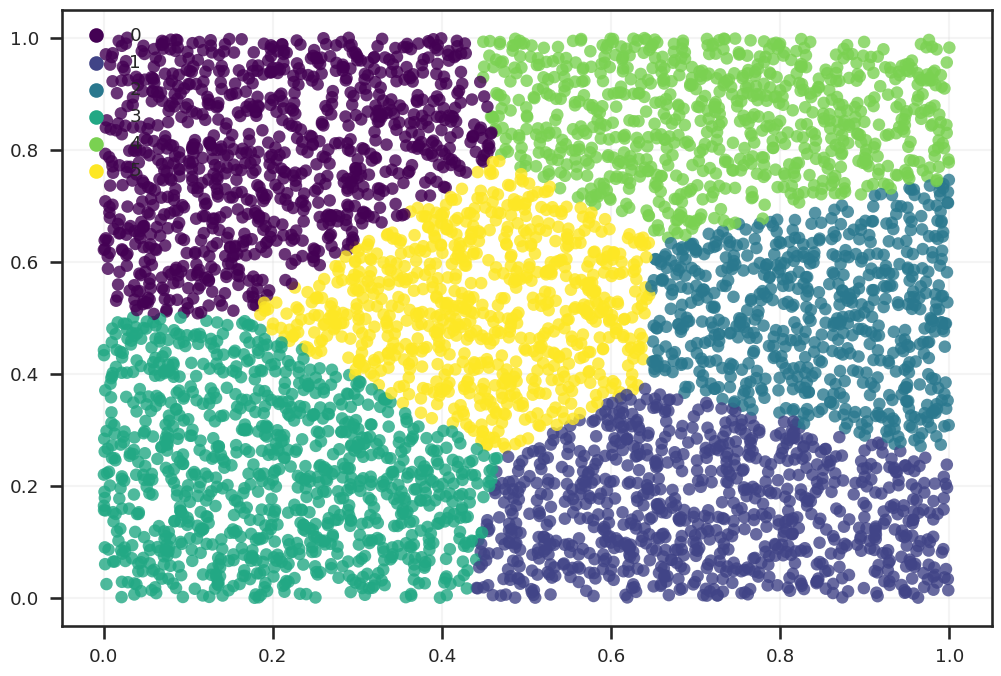

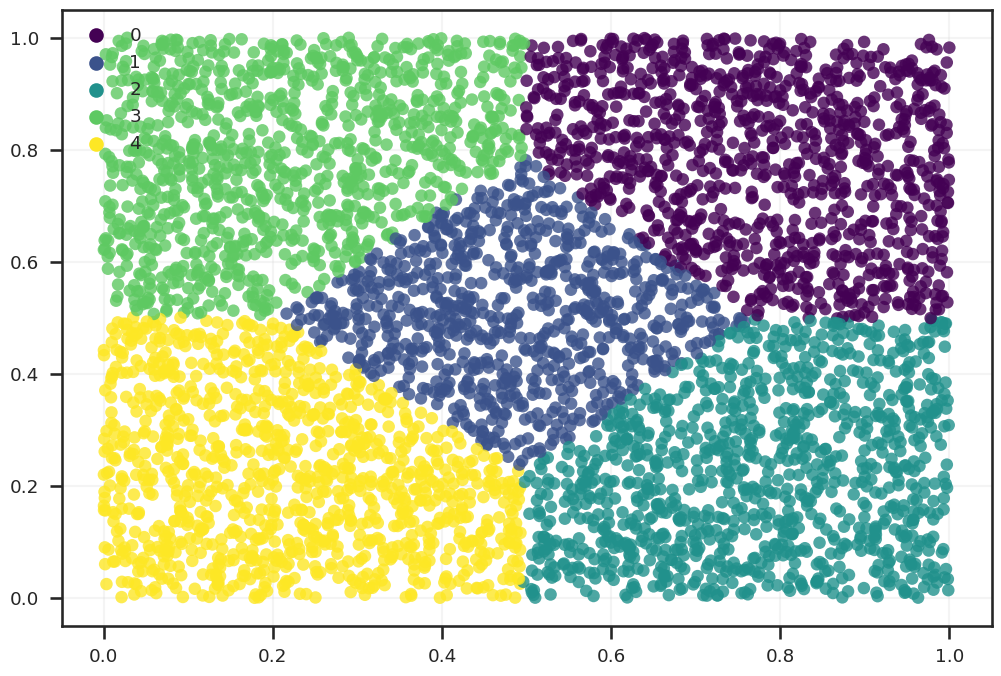

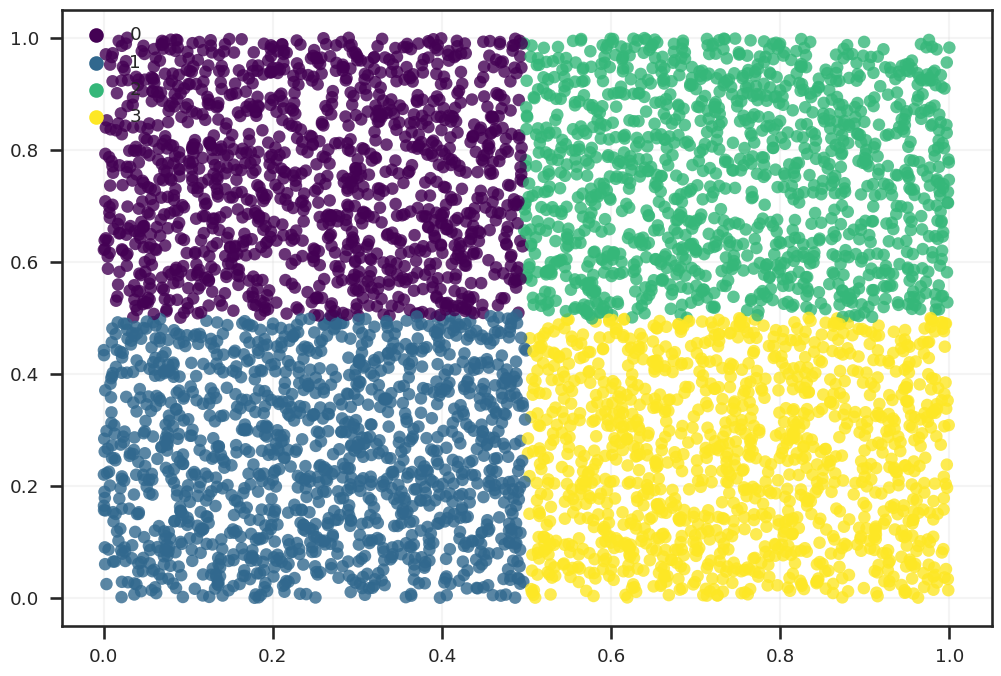

In [ ]:
@interact(k=(2,11), data=['X','X_random'])
def plot_kmeans(k, data):
  data = X if data=='X' else X_random
  model = KMeans(n_clusters=k, random_state=0)
  labels = model.fit_predict(data)
  sns.scatterplot(x=data[:,0], y=data[:,1], hue=labels, **scatter_kwargs)

## K-MEANS COM ALTA DIMENSÃO:
MUITAS COLUNAS NO NOSSO DATASET

In [ ]:
# SIMULAR CLUSTERIZAÇÃO COM ALTA DIMENSÃO DE DADOS:

X_dim,y_dim = datasets.make_blobs(n_samples=int(1000), n_features=10, centers=4, cluster_std=.8, random_state=0)
df_dim = pd.DataFrame(X_dim, columns=list(string.ascii_uppercase[:X_dim.shape[1]]))
df_dim.head()

,A,B,C,D,E,F,G,H,I,J
0,1.375988,3.328840,2.252246,0.163276,-2.048389,1.498086,-1.626945,7.672603,9.713141,-2.330450
1,-4.778629,5.591210,-0.834382,0.333095,-10.125881,3.179277,2.914841,1.443623,9.603470,5.607201
2,11.184614,5.196295,-0.802285,5.042595,-7.432989,3.606461,-7.730530,8.711666,1.110940,-1.709037
3,9.696156,5.280882,-1.214031,4.589872,-8.312332,3.070013,-6.423507,9.210979,1.207334,-1.770543
4,-4.262755,4.842532,-0.878987,1.944770,-8.669946,2.534408,2.236930,0.444544,8.682765,3.178775


In [ ]:
# APLICAR TÉCNICA DE PCA, PARA DIMINUIR A DIMENSIONALIDADE DOS DADOS:

pca = PCA()
pca_components = pca.fit_transform(df_dim) #treinar e transformar os dados

df_pca = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(pca_components.shape[1])])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-5.856883,3.122523,6.136654,-0.686487,0.347968,-0.618029,-0.467717,-0.505754,-0.563464,0.814840
1,-11.436590,-6.559320,-4.410817,-1.239685,-0.029943,1.017996,0.895097,-0.878642,-0.584850,-0.537870
2,6.443283,9.334398,-3.091811,-1.298623,-0.771382,0.358402,0.372171,-0.301598,-1.050753,0.198899
3,5.114664,8.403564,-3.589742,-1.178399,-0.325189,-0.178110,-0.224107,-0.534450,0.190508,0.744221
4,-10.328252,-5.222973,-3.462066,0.586746,-0.655750,1.066886,-0.717080,0.606951,-1.759044,0.041215


In [ ]:
# VERIFICAR A VARIAÇÃO EXPLICADA

pd.DataFrame(
    {'explained_var': pca.explained_variance_ratio_, 'explained_var_cumsum': pca.explained_variance_ratio_.cumsum()},
    index=df_pca.columns
)

# podemos ler: a variancia do PC1 explica 55% da variancia de todo Dataset...

,explained_var,explained_var_cumsum
PC1,0.553295,0.553295
PC2,0.307542,0.860836
PC3,0.108453,0.969289
PC4,0.004899,0.974188
PC5,0.004765,0.978953
PC6,0.004509,0.983462
PC7,0.004389,0.987851
PC8,0.004282,0.992133
PC9,0.004086,0.996219
PC10,0.003781,1.000000


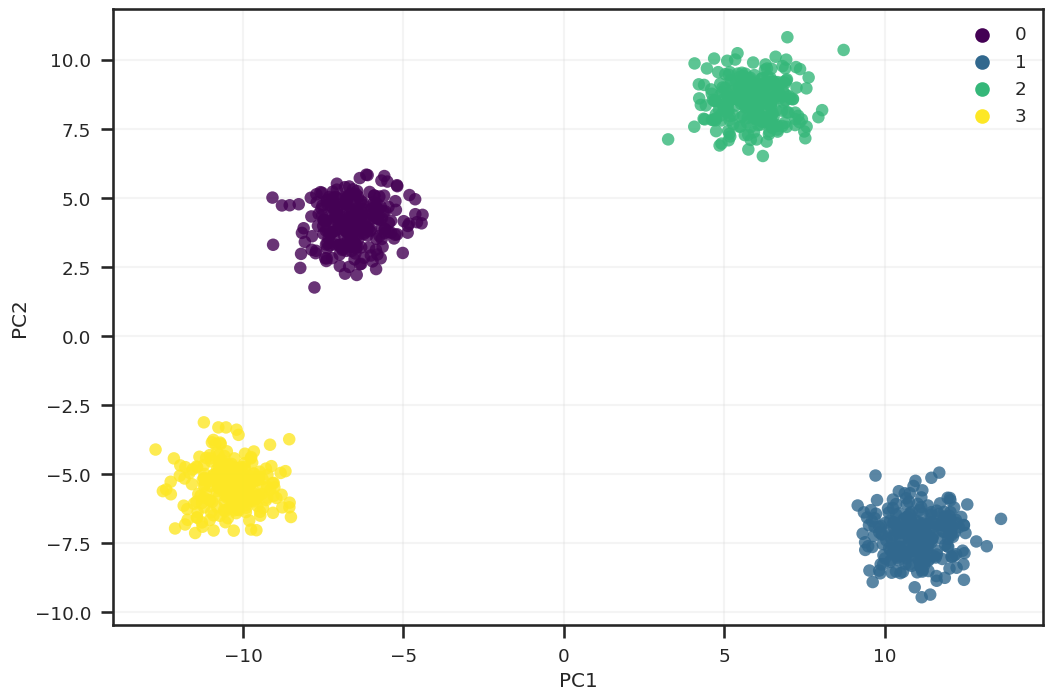

In [ ]:
# PLOTAR PCA with true label

sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=y_dim, **scatter_kwargs);

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


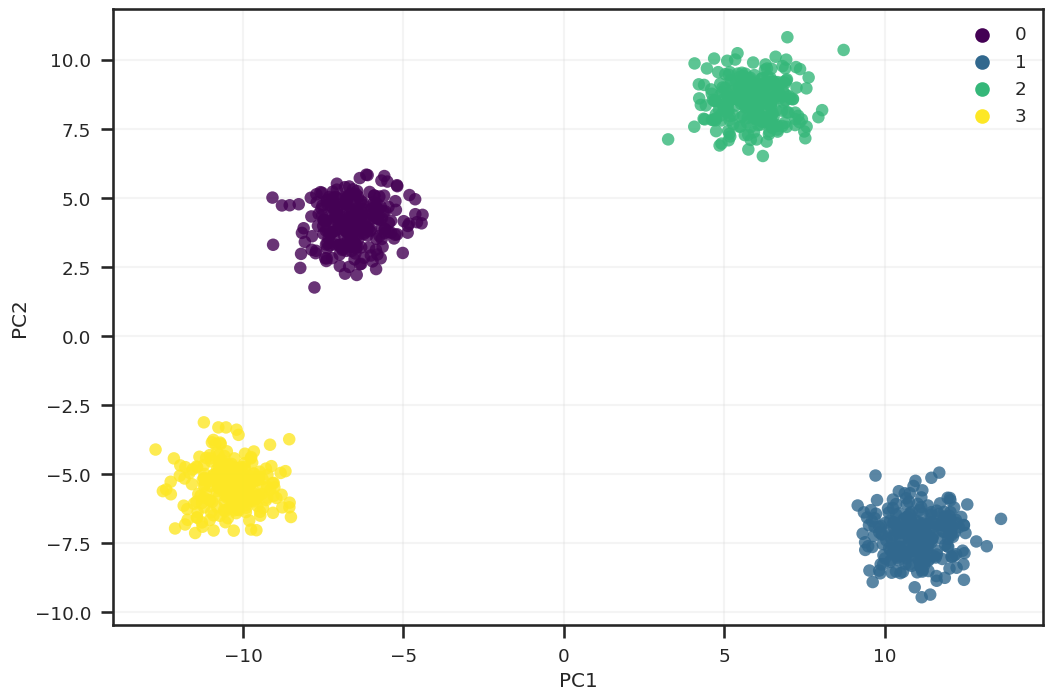

In [ ]:
# PLOTAR PCA COM DADOS DO K-mean:

labels = k_means(df_pca.iloc[:,:3], 4)[1]
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=y_dim, **scatter_kwargs);

In [ ]:
# 3D PCA plot

px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3', color=labels, template='plotly_dark')